# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "RF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'RF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_RF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.300  1  0.607 0.437 0.003   
                             age        0.091  1  0.184 0.669 0.001   
                             Kiel       1.750  1  3.543 0.061 0.018   
                             Magdeburg  4.233  1  8.569 0.004 0.043   
                             Sweden     6.877  1 13.922 0.000 0.068   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.109  1  0.111 0.740 0.001   
                             age        1.577  1  1.607 0.206 0.008   
                             Kiel       0.213  1  0.216 0.642 0.001   
                             Magdeburg  3.418  1  3.482 0.064 0.018   
                             Sweden    11.795  1 12.016 0.001 0.059   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.360  0.596    False  
                             age               0.175  0.788    False  
                             Kiel              1.212  0.144    False  
                             Magdeburg         2.416  0.015     True  
                             Sweden            3.600  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.131  0.841    False  
                             age               0.685  0.358    False  
                             Kiel              0.192  0.768    False  
                             Magdeburg         1.197  0.148    False  
                             Sweden            3.186  0.003     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     RF                        \
var                                       SS DF      F p-unc   np2   
protein groups               Source                                  
A0A024QZX5;A0A087X1N8;P35237 AD        0.995  1  7.487 0.007 0.038   
                             age       0.004  1  0.032 0.859 0.000   
                             Kiel      0.225  1  1.693 0.195 0.009   
                             Magdeburg 0.407  1  3.062 0.082 0.016   
                             Sweden    1.571  1 11.823 0.001 0.058   
...                                      ... ..    ...   ...   ...   
S4R3U6                       AD        0.833  1  1.798 0.182 0.009   
                             age       0.992  1  2.143 0.145 0.011   
                             Kiel      1.617  1  3.491 0.063 0.018   
                             Magdeburg 1.025  1  2.213 0.139 0.011   
                             Sweden    9.369  1 20.229 0.000 0.096   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.167  0.020     True  
                             age               0.066  0.915    False  
                             Kiel              0.710  0.316    False  
                             Magdeburg         1.088  0.159    False  
                             Sweden            3.144  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.741  0.299    False  
                             age               0.839  0.251    False  
                             Kiel              1.199  0.129    False  
                             Magdeburg         0.858  0.242    False  
                             Sweden            4.924  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.437         0.360  0.596    False   
                             age       0.669         0.175  0.788    False   
                             Kiel      0.061         1.212  0.144    False   
                             Magdeburg 0.004         2.416  0.015     True   
                             Sweden    0.000         3.600  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.740         0.131  0.841    False   
                             age       0.206         0.685  0.358    False   
                             Kiel      0.642         0.192  0.768    False   
                             Magdeburg 0.064         1.197  0.148    False   
                             Sweden    0.001         3.186  0.003     True   

model                                     RF                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.007         2.167  0.020     True  
                             age       0.859         0.066  0.915    False  
                             Kiel      0.195         0.710  0.316    False  
                             Magdeburg 0.082         1.088  0.159    False  
                             Sweden    0.001         3.144  0.003     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.182         0.741  0.299    False  
                             age       0.145         0.839  0.251    False  
                             Kiel      0.063         1.199  0.129    False  
                             Magdeburg 0.139         0.858  0.242    False  
                             Sweden    0.000         4.924  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'RF': 'RF'}

## Describe scores

In [10]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.263         2.482     0.341     0.235         3.096     0.293
std       0.305         5.330     0.333     0.298         5.844     0.326
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.334     0.014     0.001         0.382     0.003
50%       0.121         0.916     0.243     0.071         1.148     0.142
75%       0.464         2.454     0.618     0.415         3.124     0.553
max       1.000       147.230     1.000     0.999        85.687     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.437         0.360   
A0A024R0T9;K7ER74;P02655                           AD     0.040         1.394   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.104         0.985   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.433         0.364   
A0A075B6H7                                         AD     0.162         0.791   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.024         1.617   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.786         0.105   
S4R3U6                                             AD     0.740         0.131   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.596    False   
A0A024R0T9;K7ER74;P02655                           AD      0.103    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.216    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.592    False   
A0A075B6H7                                         AD      0.301    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.319    False   
Q9Y6X5                                             AD      0.069    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.183    False   
Q9Y6Y9                                             AD      0.874    False   
S4R3U6                                             AD      0.841    False   

model                                                        RF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.007         2.167   
A0A024R0T9;K7ER74;P02655                           AD     0.030         1.523   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.370         0.432   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.260         0.585   
A0A075B6H7                                         AD     0.012         1.938   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.195         0.709   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.337         0.473   
S4R3U6                                             AD     0.182         0.741   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.020     True  
A0A024R0T9;K7ER74;P02655                           AD      0.070    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.509    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.395    False  
A0A075B6H7                                         AD      0.032     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.259         1.391     0.342     0.249         1.522     0.314
std       0.298         1.601     0.322     0.299         1.765     0.322
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.012         0.360     0.040     0.009         0.364     0.027
50%       0.131         0.883     0.257     0.101         0.997     0.188
75%       0.437         1.904     0.596     0.432         2.022     0.569
max       1.000        19.401     1.000     0.999        18.444     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,RF
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1039,973


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.437         0.360  0.596   
A0A024R0T9;K7ER74;P02655                           0.040         1.394  0.103   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.104         0.985  0.216   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.433         0.364  0.592   
A0A075B6H7                                         0.162         0.791  0.301   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.319   
Q9Y6X5                                             0.024         1.617  0.069   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.183   
Q9Y6Y9                                             0.786         0.105  0.874   
S4R3U6                                             0.740         0.131  0.841   

                                                               RF  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.007   
A0A024R0T9;K7ER74;P02655                              False 0.030   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.370   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.260   
A0A075B6H7                                            False 0.012   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.195   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.337   
S4R3U6                                                False 0.182   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.167  0.020   
A0A024R0T9;K7ER74;P02655                                   1.523  0.070   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.432  0.509   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.585  0.395   
A0A075B6H7                                                 1.938  0.032   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.291   
Q9Y6X5                                                     0.709  0.317   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.162   
Q9Y6Y9                                                     0.473  0.477   
S4R3U6                                                     0.741  0.299   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - RF (no)    910
PI (yes) - RF (yes)   319
PI (no)  - RF (yes)   129
PI (yes) - RF (no)     63
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                  RF  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.437         0.360  0.596    False 0.007   
A0A075B6H7                   0.162         0.791  0.301    False 0.012   
A0A075B6I0                   0.017         1.772  0.052    False 0.001   
A0A075B6Q5                   0.545         0.264  0.688    False 0.013   
A0A075B6R2                   0.430         0.366  0.590    False 0.002   
...                            ...           ...    ...      ...   ...   
Q9UKB5                       0.014         1.839  0.046     True 0.456   
Q9ULZ9                       0.000         3.651  0.001     True 0.044   
Q9UP79                       0.217         0.664  0.370    False 0.000   
Q9UQ52                       0.050         1.299  0.123    False 0.001   
Q9Y6C2                       0.807         0.093  0.889    False 0.007   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.167  0.020     True       186  
A0A075B6H7                           1.938  0.032     True        91  
A0A075B6I0                           3.106  0.003     True       194  
A0A075B6Q5                           1.886  0.035     True       104  
A0A075B6R2                           2.786  0.006     True       164  
...                                    ...    ...      ...       ...  
Q9UKB5                               0.341  0.589    False       148  
Q9ULZ9                               1.353  0.097    False       171  
Q9UP79                               3.696  0.001     True       135  
Q9UQ52                               3.088  0.003     True       188  
Q9Y6C2                               2.165  0.020     True       119  

[192 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,RF,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.596,0.020,186,PI (no) - RF (yes)
A0A024R0T9;K7ER74;P02655,0.103,0.070,195,PI (no) - RF (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.216,0.509,174,PI (no) - RF (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.592,0.395,196,PI (no) - RF (no)
A0A075B6H7,0.301,0.032,91,PI (no) - RF (yes)
...,...,...,...,...
Q9Y6R7,0.319,0.291,197,PI (no) - RF (no)
Q9Y6X5,0.069,0.317,173,PI (no) - RF (no)
Q9Y6Y8;Q9Y6Y8-2,0.183,0.162,197,PI (no) - RF (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,RF,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
O94898,0.985,0.003,60,PI (no) - RF (yes),0.982
F6VDH7;P50502;Q3KNR6,0.009,0.991,175,PI (yes) - RF (no),0.982
P48745,0.978,0.009,180,PI (no) - RF (yes),0.969
O95497,0.961,0.000,89,PI (no) - RF (yes),0.961
E5RJY1;E7ESM1;Q92597;Q92597-2;Q92597-3,0.957,0.008,60,PI (no) - RF (yes),0.949
...,...,...,...,...,...
Q16706,0.046,0.054,195,PI (yes) - RF (no),0.008
P00740;P00740-2,0.053,0.045,197,PI (no) - RF (yes),0.008
Q9P2E7;Q9P2E7-2,0.043,0.051,196,PI (yes) - RF (no),0.008


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_1_RF


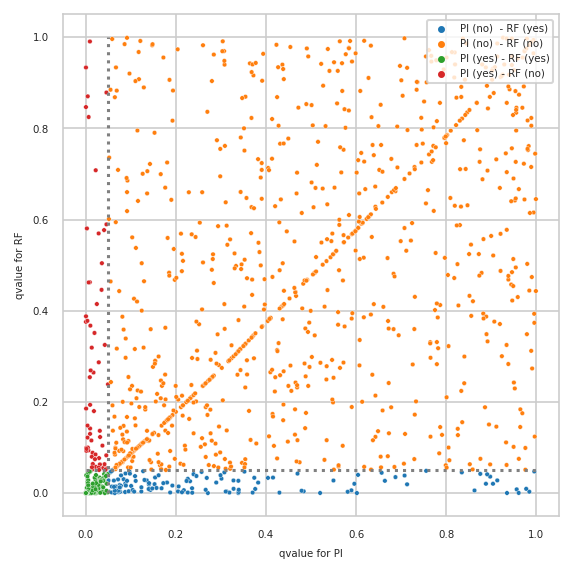

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_2_RF


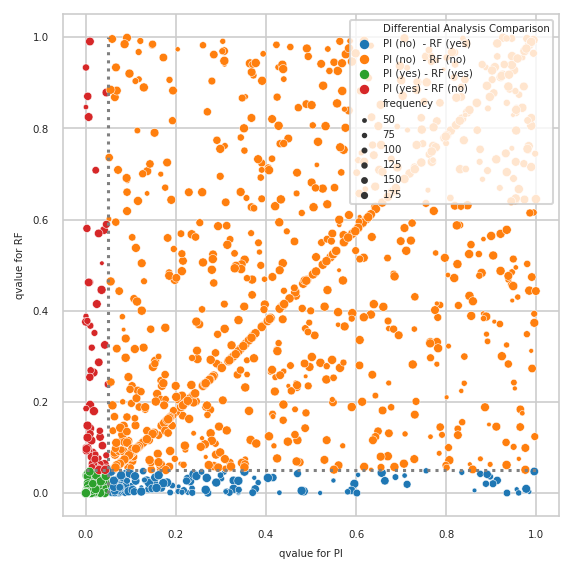

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out